<a href="https://colab.research.google.com/github/Hristy26/cryptoClustering/blob/main/Crypto_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [5]:
# Create a DataFrame with the scaled data
scaled_data = scaler.fit_transform(market_data_df)
# Copy the crypto names from the original data
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

# Set the coinid column as index


# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))



# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_values, "inertia" : inertia})

# Display the DataFrame
display(elbow_df)


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: xlabel='k'>

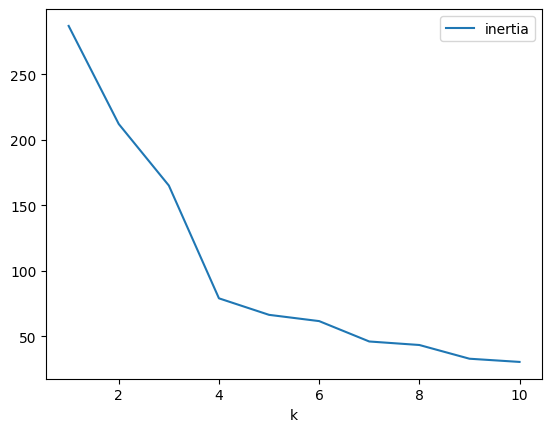

In [7]:
inertia_df = pd.DataFrame({"k": k_values, "inertia": inertia})
inertia_df.plot(x='k', y='inertia')



In [30]:
k = inertia_df["k"]
inertia = inertia_df['inertia']
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[1]) / inertia[1-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 29.02%
Percentage decrease from k=2 to k=3: 0.00%
Percentage decrease from k=3 to k=4: -18.26%
Percentage decrease from k=4 to k=5: -51.65%
Percentage decrease from k=5 to k=6: -55.93%
Percentage decrease from k=6 to k=7: -57.55%
Percentage decrease from k=7 to k=8: -61.75%
Percentage decrease from k=8 to k=9: -63.75%
Percentage decrease from k=9 to k=10: -64.92%


#### Answer the following question:
**Question:** What is the best value for `k`?


**Answer:**The best value for k, determined by the elbow in the inertia plot ,appears to be 3.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=5, random_state=0)


In [10]:
# Fit the K-Means model using the scaled data
KMeans_model.fit(scaled_df )


KMeans(n_clusters=5, random_state=0)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = KMeans_model.predict(scaled_df)

# View the resulting array of cluster values.
print(predicted_clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 4 0 0 1 2 0 0 3
 0 0 0 0]


In [12]:
# Create a copy of the DataFrame
scaled_df_predict = scaled_df.copy()



In [13]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_predict['predicted_cluster'] = predicted_clusters

# Display sample data
scaled_df_predict.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


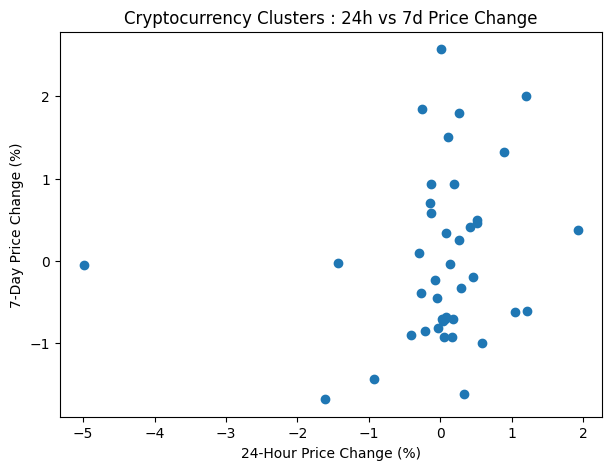

In [14]:
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

plt.figure(figsize= (7, 5))
plt.scatter(scaled_df_predict['price_change_percentage_24h'], scaled_df_predict['price_change_percentage_7d'],)
plt.title('Cryptocurrency Clusters : 24h vs 7d Price Change')
plt.xlabel('24-Hour Price Change (%)')
plt.ylabel('7-Day Price Change (%)')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)
print(pca_data[:5])

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [16]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()


# View the first five rows of the DataFrame.



,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [31]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The sum of the values in the array.
0.3719856 + 0.34700813 + 0.17603793 = 0.89503166
The total explained variance of the three principal components is  the sum of the values in the array.

0.3719856 + 0.34700813 + 0.17603793 = 0.89503166

In [32]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(
    data=pca_data, columns=["PC1", "PC2", "PC3"]
)

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
pca_df["coin_id"] = scaled_df.index

# Set the coinid column as index
pca_df = pca_df.set_index("coin_id")


# Display the DataFrame
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [19]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia =[]
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, n_init='auto', random_state=1)
    model.fit(pca_df)
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_values, "inertia" : inertia})

# Display the DataFrame
display(elbow_df)


,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582
5,6,34.507577
6,7,23.728365
7,8,18.574523
8,9,15.572672
9,10,11.407667


<Axes: xlabel='k'>

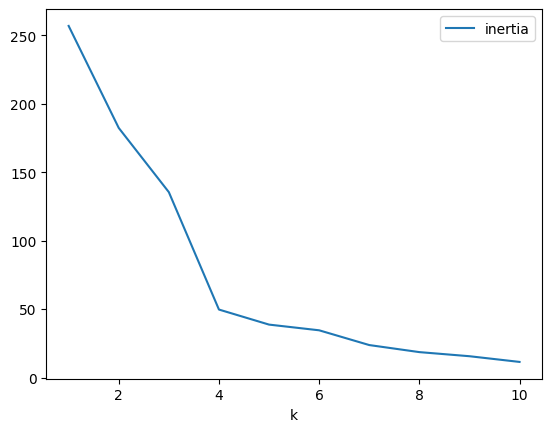

In [20]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
inertia_df = pd.DataFrame({"k": k_values, "inertia": inertia})
inertia_df.plot(x='k', y='inertia')


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Looking at the elbo in the inertia plot, the best value for k is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**Yes, the best value in the original data was 3.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
KMeans_model = KMeans(n_clusters=5, random_state=0)


In [22]:
# Fit the K-Means model using the PCA data
KMeans_model.fit(pca_df)

KMeans(n_clusters=5, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = KMeans_model.predict(pca_df)


# View the resulting array of cluster values.
print(predicted_clusters_pca)


[4 4 0 0 2 2 2 2 4 4 0 0 0 2 4 4 0 4 2 0 0 4 0 4 0 0 4 0 2 0 4 4 1 4 0 0 3
 0 4 0 0]


In [24]:
# Create a copy of the DataFrame with the PCA data
pca_df_predict = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_predict['predicted_cluster'] = predicted_clusters_pca

# Display sample data
pca_df_predict.head()


,PC1,PC2,PC3,predicted_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,4
ethereum,-0.458261,0.458466,0.952877,4
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [25]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`.
!pip install hvplot==0.8.4
import hvplot.pandas

# Assuming 'pca_df' is your DataFrame with PCA data and predicted clusters
pca_df = pca_df.reset_index(drop=True)
# Create a scatter plot using hvPlot
pca_df_predict.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="predicted_cluster",  # Color points by predicted cluster
    hover_cols=["coin_id"],  # Show coin_id on hover
    title="Cryptocurrency Clusters (PC)",
)


:NdOverlay   [predicted_cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [26]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(index=scaled_df.columns)


In [27]:
pca.components_

array([[-0.41672777, -0.10243154, -0.0091623 ,  0.1915226 ,  0.32036496,
         0.59446798,  0.56837928],
       [ 0.35816187,  0.22743192,  0.54041516,  0.56218228,  0.43403994,
         0.02773475, -0.15078941],
       [-0.21879492,  0.7876703 ,  0.34953356, -0.18174374, -0.36137707,
         0.03973325,  0.21054134]])

In [28]:
weights_df = pd.DataFrame(
    data=pca.components_,
    columns=scaled_df.columns,
    index=["PC1", "PC2", "PC3"],
)
weights_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


In [33]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=weights_df)

https://docs.google.com/spreadsheets/d/1vaOd3nWxyUTjY5glYkklWZ8rDqsnj6k53avZaC0etK4#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:**
The strongest positive influences are

Looking at your generated weights, here's a possible answer:

total_supply,(PC1) has the strongest positive influence, and price_change_percentage_24h has the strongest negative influence.

Total_volume,(PC2)  has the strongest positive influence, and price_change_percentage_7d has the strongest negative influence.

price_change_percentage_14d (pc3) has the strongest positive influence, and price_change_percentage_24h has the strongest negative influence.
    